In [45]:
import sys
import yaml
from pprint import pprint
import json
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from kneed import KneeLocator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from collections import Counter


In [46]:
Spotify_data = pd.read_csv('Spotify_Dataset_V3.csv', delimiter=';')
Spotify_data_noduplicates = Spotify_data.groupby(['Title']).first().reset_index()

In [47]:
Spotify_data_noduplicates

,Title,Rank,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,'98 Braves,158,Morgan Wallen,06/03/2023,0.488,0.670,-5759.0,0.027,0.097,0.0,0.484,Artist 1,Morgan Wallen,Nationality 1,United States,Anglo-America,43,43.0,3oZ6dlSfCE9gZ55MGPJctc,https://open.spotify.com/track/3oZ6dlSfCE9gZ55...
1,!,152,Trippie Redd,10/08/2019,0.725,0.543,-6311.0,0.084,0.030,0.0,0.693,Artist 1,Trippie Redd,Nationality 1,United States,Anglo-America,49,49.0,5a1ofLoPiAn5xxf5UE6472,https://open.spotify.com/track/5a1ofLoPiAn5xxf...
2,#PROUDCATOWNERREMIX,189,"XXXTENTACION, Rico Nasty",23/08/2019,0.783,0.522,-6229.0,0.390,0.029,0.0,0.235,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,12,6.0,5dkZ2DrcPJrqwlRQe6Q35e,https://open.spotify.com/track/5dkZ2DrcPJrqwlR...
3,$$$,161,XXXTENTACION,21/06/2018,0.774,0.507,-6952.0,0.065,0.064,0.0,0.508,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,40,40.0,65u1dHQyQyE4y4aN2eDmMF,https://open.spotify.com/track/65u1dHQyQyE4y4a...
4,$€ Freestyle,76,Sfera Ebbasta,20/11/2020,0.813,0.670,-8661.0,0.335,0.200,0.0,0.380,Artist 1,Sfera Ebbasta,Nationality 1,Italy,Europe,125,125.0,2j9wr1cxfYcMJoANfmoJA9,https://open.spotify.com/track/2j9wr1cxfYcMJoA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,Î©. VIVRE UN PEU,166,Damso,29/04/2021,0.416,0.528,-10348.0,0.291,0.178,0.0,0.203,Artist 1,Damso,Nationality 1,Belgium,Europe,35,35.0,5UNFWkGaEJgQFqoJxZWMzm,https://open.spotify.com/track/5UNFWkGaEJgQFqo...
7453,ÎŸ. OG,84,Damso,29/04/2021,0.576,0.446,-10103.0,0.044,0.773,0.4,0.060,Artist 1,Damso,Nationality 1,Belgium,Europe,117,117.0,63ALxy05IGeKrfOjvGG7lO,https://open.spotify.com/track/63ALxy05IGeKrfO...
7454,İmdat,198,cakal,04/05/2022,0.786,0.748,-7568.0,0.162,0.267,0.0,0.562,Artist 1,cakal,Nationality 1,Turkey,Europe,3,3.0,123hB20IVD2yw1NMIgrqb3,https://open.spotify.com/track/123hB20IVD2yw1N...
7455,アイドル,107,YOASOBI,29/05/2023,0.574,0.935,-2783.0,0.093,0.112,0.0,0.836,Artist 1,YOASOBI,Nationality 1,Japan,Asia,94,94.0,7ovUcF5uHTBRzUpB6ZOmvt,https://open.spotify.com/track/7ovUcF5uHTBRzUp...


In [48]:
features_columns = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']


non_features_columns = [
    'Title', 'Rank', 'Artists', 'Date', '# of Artist', 'Artist (Ind.)',
    '# of Nationality', 'Nationality', 'Continent', 'Points (Total)',
    'Points (Ind for each Artist/Nat)', 'id', 'Song URL']

features_data = Spotify_data_noduplicates[features_columns]
features_data

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
0,0.488,0.670,-5759.0,0.027,0.097,0.0,0.484
1,0.725,0.543,-6311.0,0.084,0.030,0.0,0.693
2,0.783,0.522,-6229.0,0.390,0.029,0.0,0.235
3,0.774,0.507,-6952.0,0.065,0.064,0.0,0.508
4,0.813,0.670,-8661.0,0.335,0.200,0.0,0.380
...,...,...,...,...,...,...,...
7452,0.416,0.528,-10348.0,0.291,0.178,0.0,0.203
7453,0.576,0.446,-10103.0,0.044,0.773,0.4,0.060
7454,0.786,0.748,-7568.0,0.162,0.267,0.0,0.562
7455,0.574,0.935,-2783.0,0.093,0.112,0.0,0.836


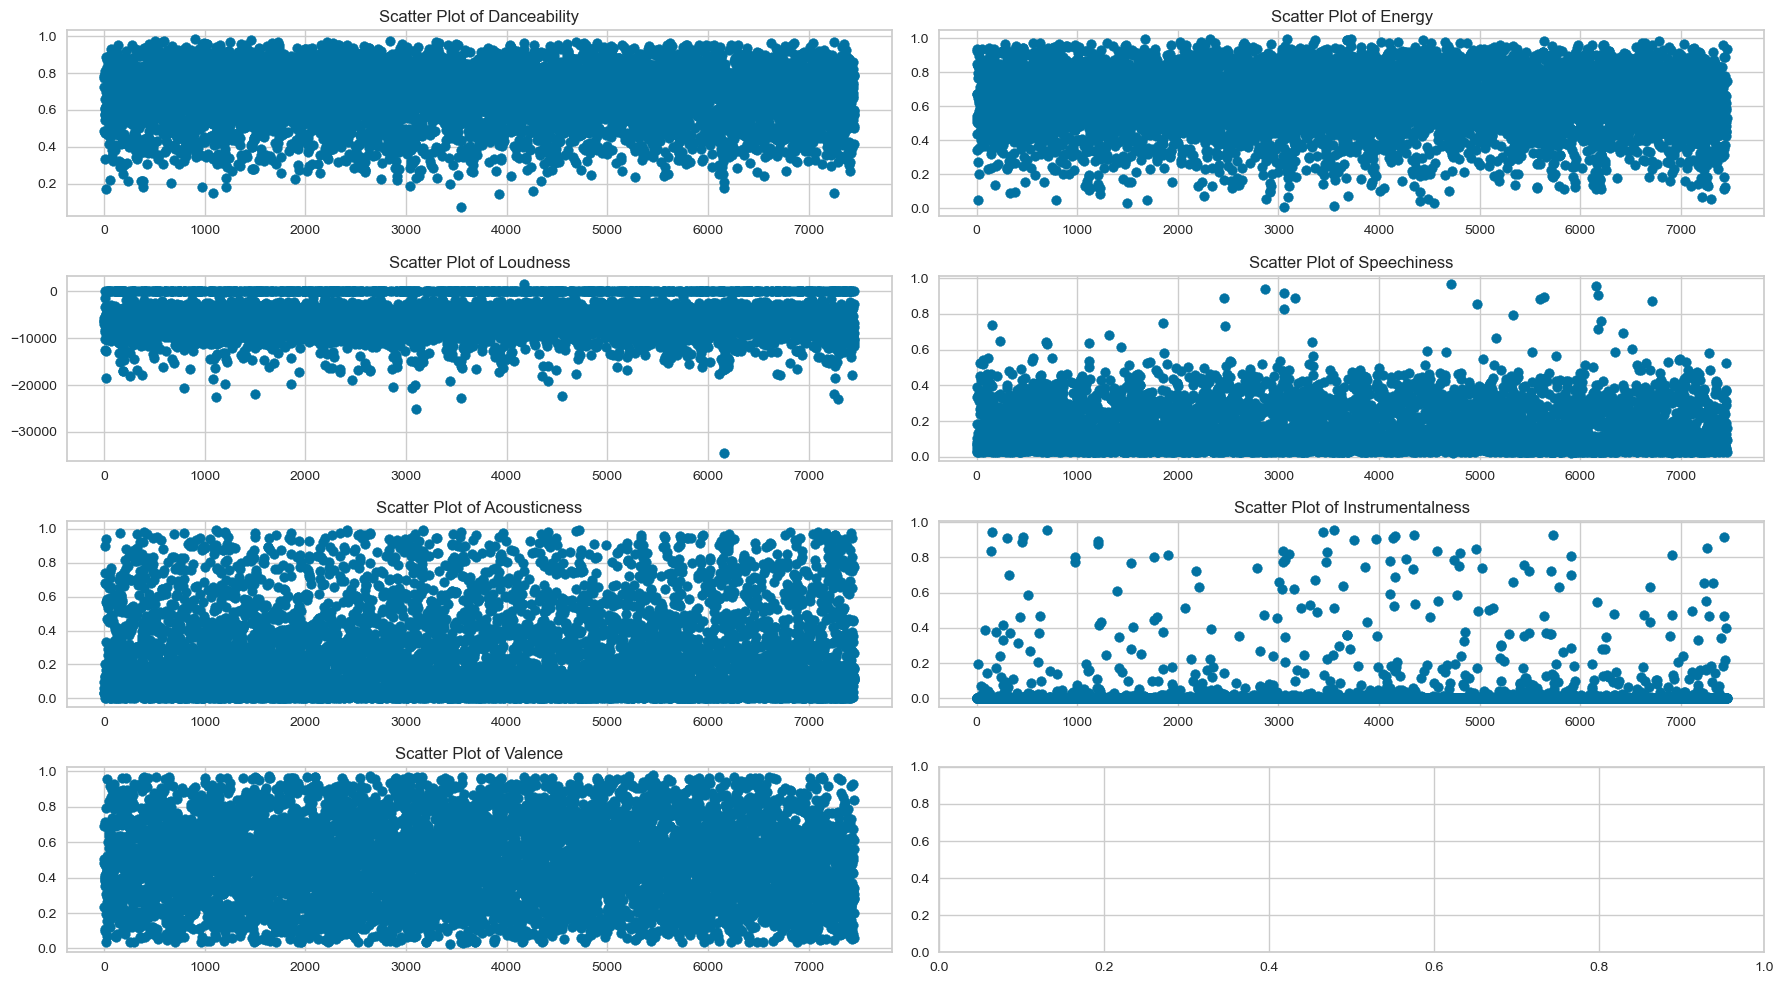

In [49]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,10))


axes = axes.flatten()


for i, feature in enumerate(features_columns):
    # Create Scatter Plot
    axes[i].scatter(features_data.index, features_data[feature])
    axes[i].set_title(f'Scatter Plot of {feature}')


plt.tight_layout()
plt.show()

In [50]:
scaler = MinMaxScaler()

In [51]:
Spotify_data_noduplicates_scaled = Spotify_data_noduplicates

Spotify_data_noduplicates_scaled[features_columns] = scaler.fit_transform (features_data)


In [52]:
Spotify_data_noduplicates_scaled

,Title,Rank,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL
0,'98 Braves,158,Morgan Wallen,06/03/2023,0.455044,0.671039,0.798021,0.005297,0.097586,0.00000,0.481092,Artist 1,Morgan Wallen,Nationality 1,United States,Anglo-America,43,43.0,3oZ6dlSfCE9gZ55MGPJctc,https://open.spotify.com/track/3oZ6dlSfCE9gZ55...
1,!,152,Trippie Redd,10/08/2019,0.714912,0.542886,0.782681,0.065678,0.030181,0.00000,0.700630,Artist 1,Trippie Redd,Nationality 1,United States,Anglo-America,49,49.0,5a1ofLoPiAn5xxf5UE6472,https://open.spotify.com/track/5a1ofLoPiAn5xxf...
2,#PROUDCATOWNERREMIX,189,"XXXTENTACION, Rico Nasty",23/08/2019,0.778509,0.521695,0.784960,0.389831,0.029175,0.00000,0.219538,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,12,6.0,5dkZ2DrcPJrqwlRQe6Q35e,https://open.spotify.com/track/5dkZ2DrcPJrqwlR...
3,$$$,161,XXXTENTACION,21/06/2018,0.768640,0.506559,0.764868,0.045551,0.064386,0.00000,0.506303,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,40,40.0,65u1dHQyQyE4y4aN2eDmMF,https://open.spotify.com/track/65u1dHQyQyE4y4a...
4,$€ Freestyle,76,Sfera Ebbasta,20/11/2020,0.811404,0.671039,0.717374,0.331568,0.201207,0.00000,0.371849,Artist 1,Sfera Ebbasta,Nationality 1,Italy,Europe,125,125.0,2j9wr1cxfYcMJoANfmoJA9,https://open.spotify.com/track/2j9wr1cxfYcMJoA...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,Î©. VIVRE UN PEU,166,Damso,29/04/2021,0.376096,0.527750,0.670492,0.284958,0.179074,0.00000,0.185924,Artist 1,Damso,Nationality 1,Belgium,Europe,35,35.0,5UNFWkGaEJgQFqoJxZWMzm,https://open.spotify.com/track/5UNFWkGaEJgQFqo...
7453,ÎŸ. OG,84,Damso,29/04/2021,0.551535,0.445005,0.677301,0.023305,0.777666,0.41841,0.035714,Artist 1,Damso,Nationality 1,Belgium,Europe,117,117.0,63ALxy05IGeKrfOjvGG7lO,https://open.spotify.com/track/63ALxy05IGeKrfO...
7454,İmdat,198,cakal,04/05/2022,0.781798,0.749748,0.747749,0.148305,0.268612,0.00000,0.563025,Artist 1,cakal,Nationality 1,Turkey,Europe,3,3.0,123hB20IVD2yw1NMIgrqb3,https://open.spotify.com/track/123hB20IVD2yw1N...
7455,アイドル,107,YOASOBI,29/05/2023,0.549342,0.938446,0.880725,0.075212,0.112676,0.00000,0.850840,Artist 1,YOASOBI,Nationality 1,Japan,Asia,94,94.0,7ovUcF5uHTBRzUpB6ZOmvt,https://open.spotify.com/track/7ovUcF5uHTBRzUp...


In [53]:
features_data_scaled = Spotify_data_noduplicates_scaled[features_columns]
features_data_scaled

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Valence
0,0.455044,0.671039,0.798021,0.005297,0.097586,0.00000,0.481092
1,0.714912,0.542886,0.782681,0.065678,0.030181,0.00000,0.700630
2,0.778509,0.521695,0.784960,0.389831,0.029175,0.00000,0.219538
3,0.768640,0.506559,0.764868,0.045551,0.064386,0.00000,0.506303
4,0.811404,0.671039,0.717374,0.331568,0.201207,0.00000,0.371849
...,...,...,...,...,...,...,...
7452,0.376096,0.527750,0.670492,0.284958,0.179074,0.00000,0.185924
7453,0.551535,0.445005,0.677301,0.023305,0.777666,0.41841,0.035714
7454,0.781798,0.749748,0.747749,0.148305,0.268612,0.00000,0.563025
7455,0.549342,0.938446,0.880725,0.075212,0.112676,0.00000,0.850840


In [54]:
k_values = range(2, 20)
sum_of_squared_distances = []
from scipy.signal import find_peaks
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(features_data_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

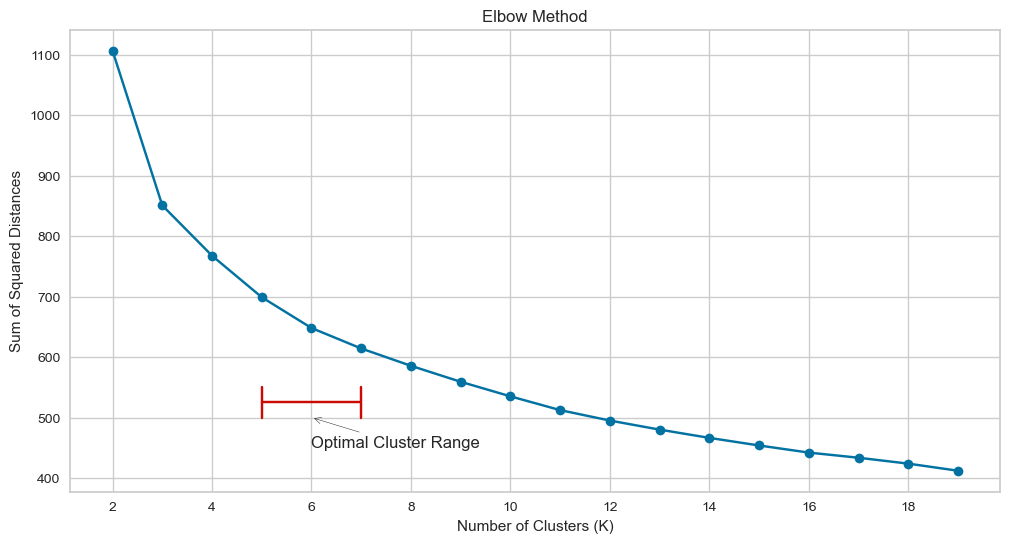

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(k_values, sum_of_squared_distances, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')

plt.xticks(range(0, 20, 2))

plt.plot([5,5],[500, 550], color='r')
plt.plot([7,7],[500, 550], color='r')
plt.plot([5,7],[525,525], color='r')
# Add annotation
plt.annotate('Optimal Cluster Range', xy=(6, 500), xycoords='data',
             xytext=(6, 450), textcoords='data', 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
             )


plt.show()

# K MEANS

In [56]:

k = 6
num_iterations = 100
tolerance = 0.0001

# Initialize the KMeans model with kMeans++ initializer and other parameters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=num_iterations, tol=tolerance, random_state=42)
kmeans.fit(features_data_scaled)
plot_labels = kmeans.labels_

silhouette = silhouette_score(features_data_scaled, kmeans.labels_)
davies_bouldin = davies_bouldin_score(features_data_scaled, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(features_data_scaled, kmeans.labels_)


scores_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score'],
    'Score': [silhouette, davies_bouldin, calinski_harabasz],'Method' : ['K-Means','K-Means','K-Means']
})


print(scores_df)

D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                    Metric        Score   Method
0         Silhouette Score     0.189509  K-Means
1     Davies-Bouldin Score     1.411226  K-Means
2  Calinski-Harabasz Score  2046.137663  K-Means


# AGGLOMERATIVE




In [57]:
k = 6 # got from elbow plot as mentioned in report
features_matrix = features_data_scaled.to_numpy()
features_matrix

agglomerative = AgglomerativeClustering(n_clusters=k,linkage='ward')
agg_labels = agglomerative.fit_predict(features_matrix)
agg_silhouette = silhouette_score(features_matrix, agg_labels)
agg_davies_bouldin = davies_bouldin_score(features_matrix, agg_labels)
agg_calinski_harabasz = calinski_harabasz_score(features_matrix, agg_labels)

scores_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score'],
    'Agglomerative Score': [agg_silhouette, agg_davies_bouldin, agg_calinski_harabasz],'Method' : ['Agglomerative','Agglomerative','Agglomerative']
})

print(scores_df)

                    Metric  Agglomerative Score         Method
0         Silhouette Score             0.130798  Agglomerative
1     Davies-Bouldin Score             1.765871  Agglomerative
2  Calinski-Harabasz Score          1608.026671  Agglomerative


# DBSCAN CLUSTERS




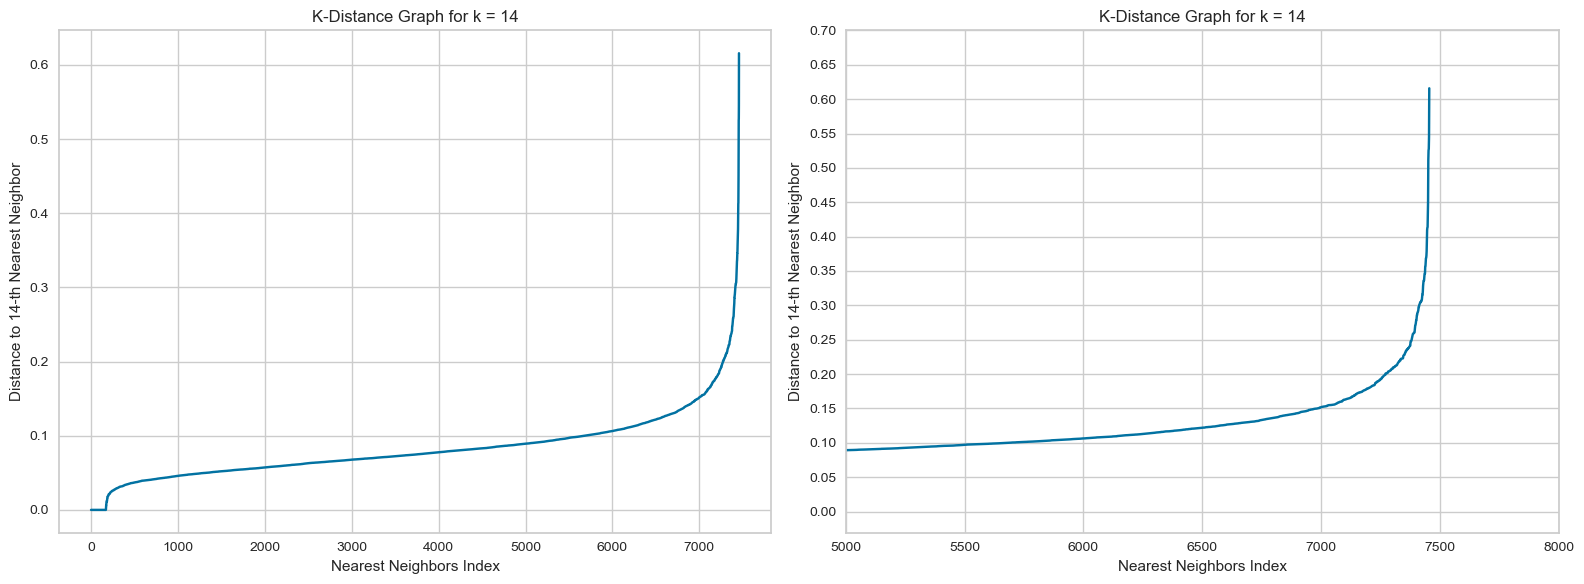

In [58]:

n_neighbors = 14 
nn = NearestNeighbors(n_neighbors=14)
nn.fit(features_data_scaled)
distances,indices= nn.kneighbors(features_data_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(distances)
ax1.set_xlabel('Nearest Neighbors Index')
ax1.set_ylabel(f'Distance to {n_neighbors}-th Nearest Neighbor')
ax1.set_title(f'K-Distance Graph for k = {n_neighbors}')
ax1.grid(True)


ax2.plot(distances)
ax2.set_xlabel('Nearest Neighbors Index')
ax2.set_ylabel(f'Distance to {n_neighbors}-th Nearest Neighbor')
ax2.set_title(f'K-Distance Graph for k = {n_neighbors}')
ax2.grid(True)
ax2.set_xlim(5000, 8000)
ax2.set_yticks(np.arange(0, 0.75, 0.05))
plt.tight_layout()
plt.show()


In [59]:
estimated_eps=0.20 #based on the knee plot above

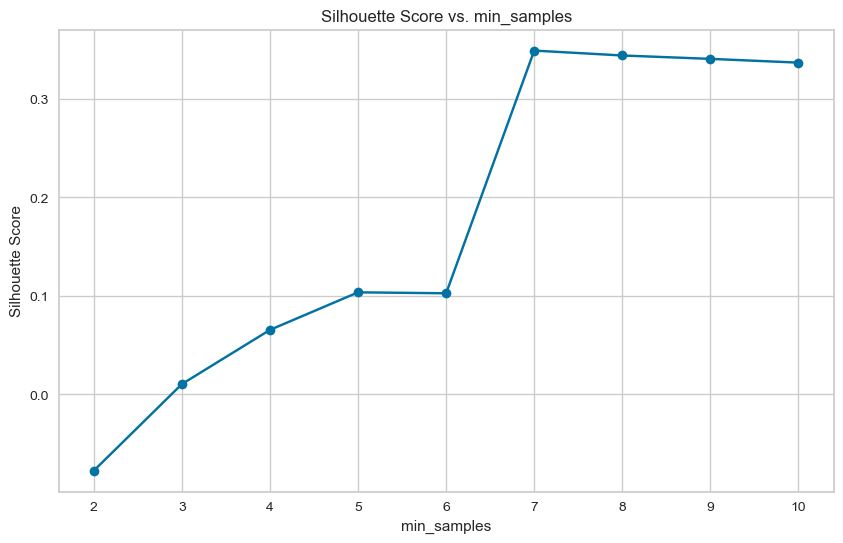

Best min_samples for Silhouette Score: 7


In [60]:

# Define a range of min_samples values to test
min_samples_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_scores = []
calinski_scores = []


for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=estimated_eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(features_data_scaled)

    silhouette = silhouette_score(features_data_scaled, dbscan_labels)
    silhouette_scores.append(silhouette)

best_min_samples_silhouette = min_samples_values[np.argmax(silhouette_scores)]


plt.figure(figsize=(10, 6))

plt.plot(min_samples_values, silhouette_scores, marker='o')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. min_samples')
plt.grid(True)
plt.show()


print(f"Best min_samples for Silhouette Score: {best_min_samples_silhouette}")

In [61]:
dbscan = DBSCAN(eps=estimated_eps, min_samples=best_min_samples_silhouette)
dbscan_labels = dbscan.fit_predict(features_data_scaled)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_data_scaled)


n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

cluster_counts = Counter(dbscan_labels)


num_noise_points = cluster_counts[-1] if -1 in cluster_counts else 0


print(f"Number of elements in each cluster: {cluster_counts}")
print(f"Number of noise points: {num_noise_points}")

Number of elements in each cluster: Counter({0: 7192, -1: 265})
Number of noise points: 265


C:\Users\Venkatesan\AppData\Local\Temp\ipykernel_24184\1650030361.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=label_name, s=30)


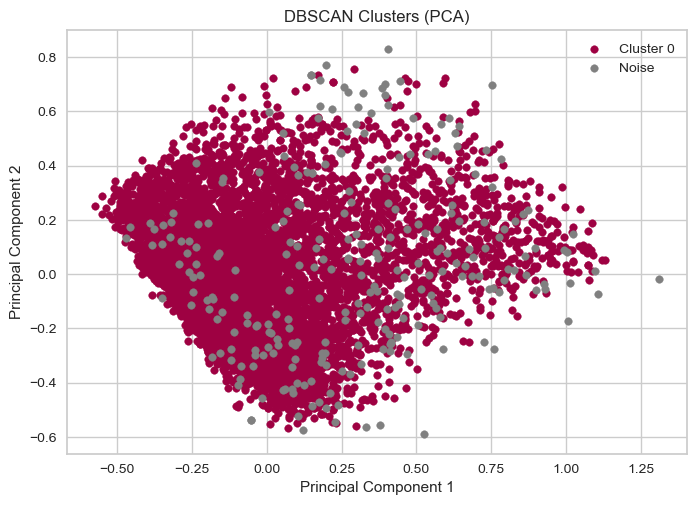

In [62]:
for label in set(dbscan_labels):
    if label == -1:
        color = 'gray'
        label_name = 'Noise'
    else:
        
        color = plt.cm.Spectral(label / (max(dbscan_labels) + 1))
        label_name = f'Cluster {label}'

    
    cluster_points = reduced_data[dbscan_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=label_name, s=30)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clusters (PCA)')
plt.legend()
plt.grid(True)
plt.show()


# CLUSTERING ANALYSIS

In [63]:
Spotify_data_noduplicates_scaled_clustered = Spotify_data_noduplicates_scaled

Spotify_data_noduplicates_scaled_clustered ['cluster'] = kmeans.fit_predict(features_data_scaled)

Spotify_data_noduplicates_scaled_clustered


D:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Title,Rank,Artists,Date,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,# of Artist,Artist (Ind.),# of Nationality,Nationality,Continent,Points (Total),Points (Ind for each Artist/Nat),id,Song URL,cluster
0,'98 Braves,158,Morgan Wallen,06/03/2023,0.455044,0.671039,0.798021,0.005297,0.097586,0.00000,...,Artist 1,Morgan Wallen,Nationality 1,United States,Anglo-America,43,43.0,3oZ6dlSfCE9gZ55MGPJctc,https://open.spotify.com/track/3oZ6dlSfCE9gZ55...,1
1,!,152,Trippie Redd,10/08/2019,0.714912,0.542886,0.782681,0.065678,0.030181,0.00000,...,Artist 1,Trippie Redd,Nationality 1,United States,Anglo-America,49,49.0,5a1ofLoPiAn5xxf5UE6472,https://open.spotify.com/track/5a1ofLoPiAn5xxf...,5
2,#PROUDCATOWNERREMIX,189,"XXXTENTACION, Rico Nasty",23/08/2019,0.778509,0.521695,0.784960,0.389831,0.029175,0.00000,...,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,12,6.0,5dkZ2DrcPJrqwlRQe6Q35e,https://open.spotify.com/track/5dkZ2DrcPJrqwlR...,3
3,$$$,161,XXXTENTACION,21/06/2018,0.768640,0.506559,0.764868,0.045551,0.064386,0.00000,...,Artist 1,XXXTENTACION,Nationality 1,United States,Anglo-America,40,40.0,65u1dHQyQyE4y4aN2eDmMF,https://open.spotify.com/track/65u1dHQyQyE4y4a...,3
4,$€ Freestyle,76,Sfera Ebbasta,20/11/2020,0.811404,0.671039,0.717374,0.331568,0.201207,0.00000,...,Artist 1,Sfera Ebbasta,Nationality 1,Italy,Europe,125,125.0,2j9wr1cxfYcMJoANfmoJA9,https://open.spotify.com/track/2j9wr1cxfYcMJoA...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7452,Î©. VIVRE UN PEU,166,Damso,29/04/2021,0.376096,0.527750,0.670492,0.284958,0.179074,0.00000,...,Artist 1,Damso,Nationality 1,Belgium,Europe,35,35.0,5UNFWkGaEJgQFqoJxZWMzm,https://open.spotify.com/track/5UNFWkGaEJgQFqo...,4
7453,ÎŸ. OG,84,Damso,29/04/2021,0.551535,0.445005,0.677301,0.023305,0.777666,0.41841,...,Artist 1,Damso,Nationality 1,Belgium,Europe,117,117.0,63ALxy05IGeKrfOjvGG7lO,https://open.spotify.com/track/63ALxy05IGeKrfO...,2
7454,İmdat,198,cakal,04/05/2022,0.781798,0.749748,0.747749,0.148305,0.268612,0.00000,...,Artist 1,cakal,Nationality 1,Turkey,Europe,3,3.0,123hB20IVD2yw1NMIgrqb3,https://open.spotify.com/track/123hB20IVD2yw1N...,5
7455,アイドル,107,YOASOBI,29/05/2023,0.549342,0.938446,0.880725,0.075212,0.112676,0.00000,...,Artist 1,YOASOBI,Nationality 1,Japan,Asia,94,94.0,7ovUcF5uHTBRzUpB6ZOmvt,https://open.spotify.com/track/7ovUcF5uHTBRzUp...,5


In [64]:
cluster_means = Spotify_data_noduplicates_scaled_clustered.groupby('cluster')[features_columns].mean().reset_index()

cluster_means_rounded = cluster_means.round(4)


print("Mean Values of Features for Each Cluster:")
print(cluster_means_rounded)


cluster_means_rounded.to_csv('cluster_means_table.csv', index=False)

Mean Values of Features for Each Cluster:
   cluster  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0        0        0.6859  0.6089    0.7931       0.1253        0.5150   
1        1        0.5937  0.7747    0.8346       0.0878        0.0877   
2        2        0.4813  0.3469    0.6904       0.0677        0.7631   
3        3        0.8034  0.5762    0.7807       0.2213        0.1073   
4        4        0.5668  0.5971    0.7885       0.0783        0.1530   
5        5        0.7476  0.7404    0.8302       0.1047        0.1334   

   Instrumentalness  Valence  
0            0.0118   0.6133  
1            0.0137   0.4834  
2            0.0437   0.2811  
3            0.0070   0.4165  
4            0.0202   0.1982  
5            0.0071   0.7803  


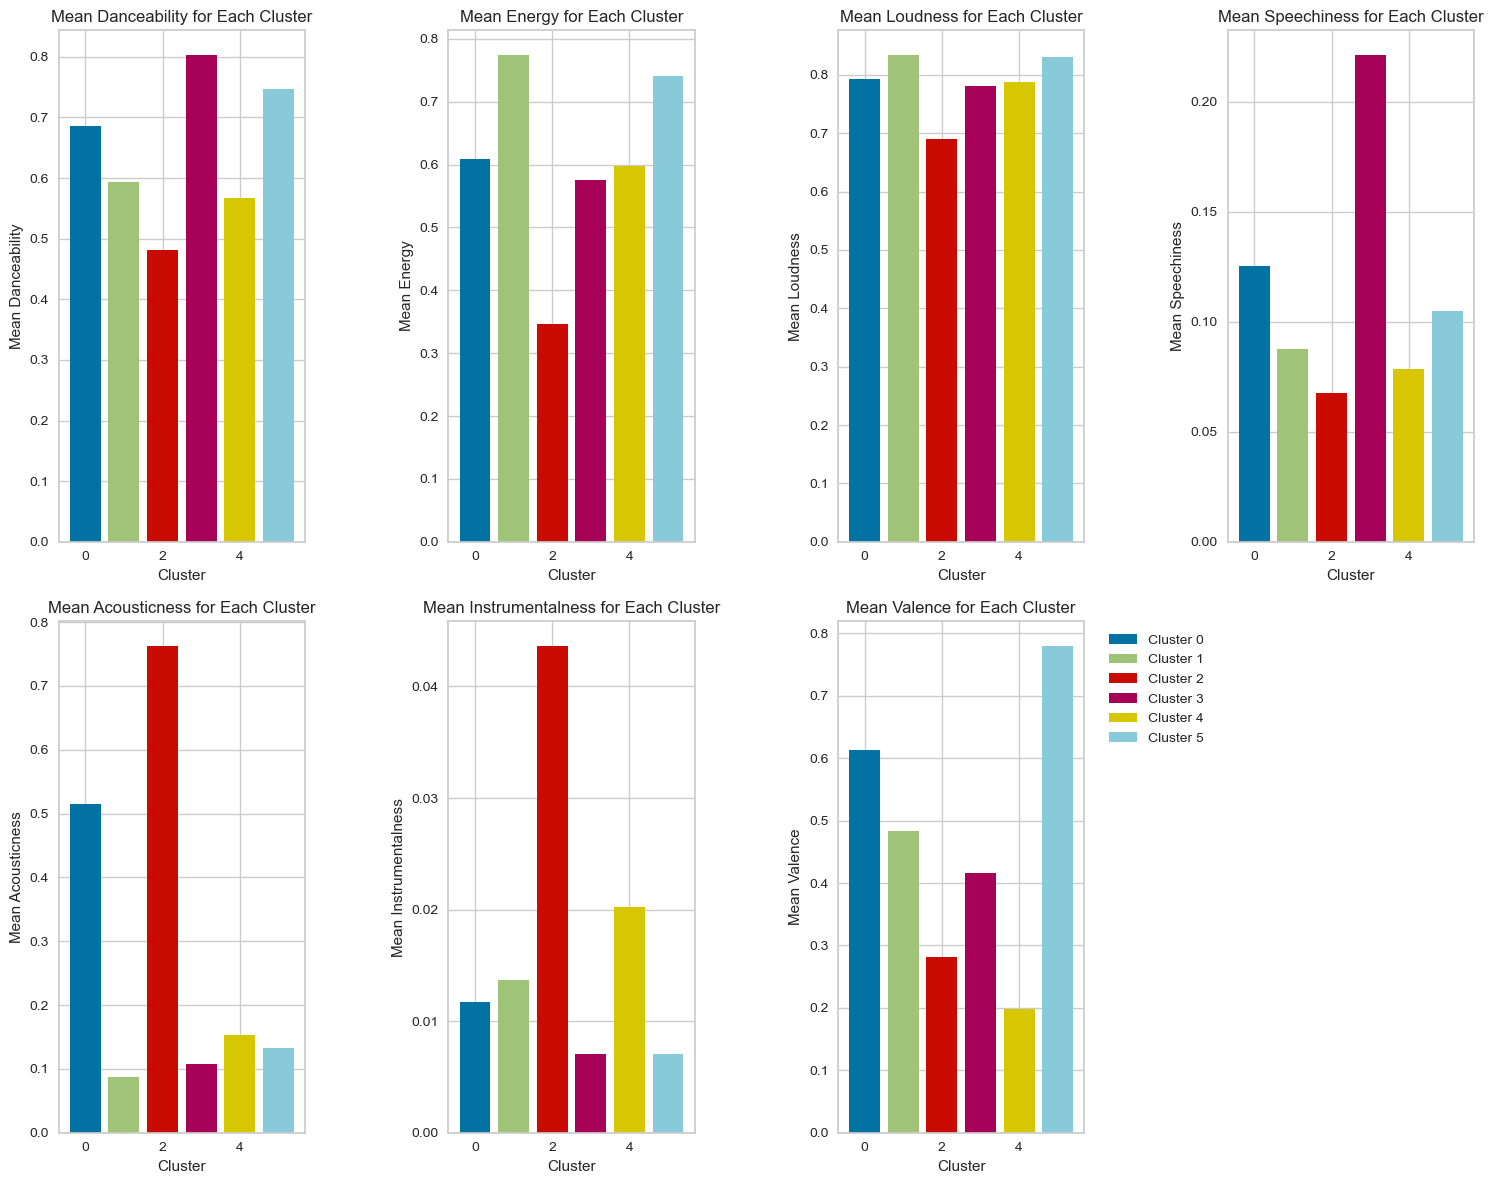

In [65]:
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_columns, start=1):
    plt.subplot(2, 4, i)
    for cluster_id in range(6):
        plt.bar(cluster_id, cluster_means[feature][cluster_id], label=f'Cluster {cluster_id}')

    plt.title(f'Mean {feature} for Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {feature}')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(r'D:\Python\AML\CW1\plots\mean_values_cluster.png')
plt.show()

In [66]:
subset_df = Spotify_data_noduplicates_scaled_clustered[features_columns]


means = subset_df.mean()
medians = subset_df.median()
max_values = subset_df.max()
min_values = subset_df.min()

summary_stats = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Max': max_values,
    'Min': min_values
})

summary_stats.to_csv('FEATURES_means_table.csv', index=False)

In [67]:
summary_stats

,Mean,Median,Max,Min
Danceability,0.661564,0.680921,1.0,0.0
Energy,0.637727,0.652876,1.0,0.0
Loudness,0.796602,0.798327,1.0,0.0
Speechiness,0.116660,0.060381,1.0,0.0
Acousticness,0.234563,0.139839,1.0,0.0
Instrumentalness,0.014829,0.000000,1.0,0.0
Valence,0.485269,0.482143,1.0,0.0


# USER RECOM

# USER

In [68]:
user1_songs_count = 1
user2_songs_count = 10

# Randomly assign songs to User 1
user1_songs = Spotify_data_noduplicates_scaled_clustered.sample(n=user1_songs_count, replace=False, random_state=55)

# Randomly assign songs to User 2
user2_songs = Spotify_data_noduplicates_scaled_clustered.sample(n=user2_songs_count, replace=False, random_state=5)


print("User 1 Songs:")
print(user1_songs[['Title', 'cluster']]) 

print("\nUser 2 Songs:")
print(user2_songs[['Title', 'cluster']])


User 1 Songs:
                               Title  cluster
308  All Around The World (La La La)        0

User 2 Songs:
                         Title  cluster
5634     Smoking on my Ex Pack        4
814            Black SpiderMan        1
372                     Always        2
5642         Snow On Tha Bluff        2
3271  Kiss Me More (feat. SZA)        5
5940                     Sweat        4
7239          fuck, i'm lonely        0
6705             WTF Do I Know        1
919          Boys Will Be Boys        0
6403         Top Down On Da WF        4


In [69]:
all_user_songs = pd.concat([user1_songs, user2_songs], ignore_index=True)

user1_features = user1_songs[features_columns]

user2_features = user2_songs[features_columns]

all_song_features = Spotify_data_noduplicates_scaled_clustered[features_columns]


mean_features_user1 = user1_features.mean()
print("\nMean values of features for User 1's songs:")
print(mean_features_user1)


mean_features_user2 = user2_features.mean()
print("\nMean values of features for User 2's songs:")
print(mean_features_user2)


Mean values of features for User 1's songs:
Danceability        0.723684
Energy              0.861756
Loudness            0.957925
Speechiness         0.011653
Acousticness        0.481891
Instrumentalness    0.067992
Valence             0.518908
dtype: float64

Mean values of features for User 2's songs:
Danceability        0.634101
Energy              0.612210
Loudness            0.800994
Speechiness         0.091419
Acousticness        0.294064
Instrumentalness    0.001674
Valence             0.394223
dtype: float64


# EUCLIDEAN

In [70]:
from sklearn.metrics import pairwise_distances

distances_user1_euclidean = pairwise_distances(user1_features, all_song_features, metric='euclidean')


distances_user2_euclidean = pairwise_distances(user2_features, all_song_features, metric='euclidean')

total_distances_user1_euclidean = distances_user1_euclidean.sum(axis=0)

total_distances_user2_euclidean = distances_user2_euclidean.sum(axis=0)


recommended_indices_user1_euclidean = total_distances_user1_euclidean.argsort()
recommended_indices_user2_euclidean = total_distances_user2_euclidean.argsort()


recommended_indices_user1_euclidean = [idx for idx in recommended_indices_user1_euclidean if idx not in user1_songs.index]
recommended_indices_user2_euclidean = [idx for idx in recommended_indices_user2_euclidean if idx not in user2_songs.index]


top_recommendations_user1_euclidean = recommended_indices_user1_euclidean[:5]
top_recommendations_user2_euclidean = recommended_indices_user2_euclidean[:5]

recommended_songs_user1_euclidean = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user1_euclidean][['Title', 'Artists', 'cluster']]
recommended_songs_user2_euclidean = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user2_euclidean][['Title', 'Artists', 'cluster']]

print("Recommendations for User 1 based on Euclidean distance:")
print(recommended_songs_user1_euclidean)

print("\nRecommendations for User 2 based on Euclidean distance:")
print(recommended_songs_user2_euclidean)

mean_features_recommended_user1_euclidean = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user1_euclidean][features_columns].mean()
print("\nMean values of features for recommended songs User 1:")
print(mean_features_recommended_user1_euclidean)


mean_features_recommended_user2_euclidean = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user2_euclidean][features_columns].mean()
print("\nMean values of features for recommended songs User 2:")
print(mean_features_recommended_user2_euclidean)


Recommendations for User 1 based on Euclidean distance:
                                    Title           Artists  cluster
5614    Slide (feat. Frank Ocean & Migos)    Calvin Harris         0
4051  Morad: Bzrp Music Sessions, Vol. 47   Bizarrap, Morad        0
3237                                 Keii          Anuel AA        0
5063                         Reggaetonera          Anuel AA        0
4818                              Poquito  Anitta, Swae Lee        0

Recommendations for User 2 based on Euclidean distance:
                                       Title       Artists  cluster
7056                                Yonaguni     Bad Bunny        1
4205       Never Leave Me (feat. Joe Janiak)        Avicii        1
2824  I Don't Do Drugs (feat. Ariana Grande)      Doja Cat        1
4663                                  Panini     Lil Nas X        0
3891       Matt Hardy 999 (feat. Juice WRLD)  Trippie Redd        1

Mean values of features for recommended songs User 1:
Danceabili

# COSINE

In [71]:
similarities_user1_cosine = 1 - pairwise_distances(user1_features, all_song_features, metric='cosine')


similarities_user2_cosine = 1 - pairwise_distances(user2_features, all_song_features, metric='cosine')

total_similarities_user1_cosine = similarities_user1_cosine.sum(axis=0)

total_similarities_user2_cosine = similarities_user2_cosine.sum(axis=0)


recommended_indices_user1_cosine = total_similarities_user1_cosine.argsort()[::-1]
recommended_indices_user2_cosine = total_similarities_user2_cosine.argsort()[::-1]


recommended_indices_user1_cosine = [idx for idx in recommended_indices_user1_cosine if idx not in user1_songs.index]
recommended_indices_user2_cosine = [idx for idx in recommended_indices_user2_cosine if idx not in user2_songs.index]


top_recommendations_user1_cosine = recommended_indices_user1_cosine[:5]
top_recommendations_user2_cosine = recommended_indices_user2_cosine[:5]


recommended_songs_user1_cosine = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user1_cosine][['Title', 'Artists', 'cluster']]
recommended_songs_user2_cosine = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user2_cosine][['Title', 'Artists', 'cluster']]

print("Recommendations for User 1 based on Cosine similarity:")
print(recommended_songs_user1_cosine)

print("\nRecommendations for User 2 based on Cosine similarity:")
print(recommended_songs_user2_cosine)

mean_features_recommended_user1_cosine = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user1_cosine][features_columns].mean()
print("\nMean values of features for recommended songs User 1:")
print(mean_features_recommended_user1_cosine)

mean_features_recommended_user2_cosine = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user2_cosine][features_columns].mean()
print("\nMean values of features for recommended songs User 2:")
print(mean_features_recommended_user2_cosine)



Recommendations for User 1 based on Cosine similarity:
                                  Title  \
3237                               Keii   
5063                       Reggaetonera   
3249                         Kids Again   
2241                             Frágil   
5614  Slide (feat. Frank Ocean & Migos)   

                                    Artists  cluster  
3237                               Anuel AA        0  
5063                               Anuel AA        0  
3249                              Sam Smith        0  
2241  Yahritza Y Su Esencia, Grupo Frontera        1  
5614                         Calvin Harris         0  

Recommendations for User 2 based on Cosine similarity:
                                            Title  \
6206  The Mantra (with Pharrell & Kendrick Lamar)   
5466                                 Sexo Virtual   
7056                                     Yonaguni   
380                              Amantes y Amigos   
1011                               

# MANHATTAN

In [72]:

manhattan_distances_user1 = pairwise_distances(user1_features, all_song_features, metric='manhattan')


manhattan_distances_user2 = pairwise_distances(user2_features, all_song_features, metric='manhattan')

total_manhattan_distances_user1 = manhattan_distances_user1.sum(axis=0)


total_manhattan_distances_user2 = manhattan_distances_user2.sum(axis=0)


recommended_indices_user1_manhattan = total_manhattan_distances_user1.argsort()
recommended_indices_user2_manhattan = total_manhattan_distances_user2.argsort()

recommended_indices_user1_manhattan = [idx for idx in recommended_indices_user1_manhattan if idx not in user1_songs.index]
recommended_indices_user2_manhattan = [idx for idx in recommended_indices_user2_manhattan if idx not in user2_songs.index]

top_recommendations_user1_manhattan = recommended_indices_user1_manhattan[:5]
top_recommendations_user2_manhattan = recommended_indices_user2_manhattan[:5]


recommended_songs_user1_manhattan = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user1_manhattan][['Title', 'Artists', 'cluster']]
recommended_songs_user2_manhattan = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user2_manhattan][['Title', 'Artists', 'cluster']]

print("Recommendations for User 1 based on Manhattan distance:")
print(recommended_songs_user1_manhattan)

print("\nRecommendations for User 2 based on Manhattan distance:")
print(recommended_songs_user2_manhattan)


mean_features_recommended_user1_manhattan = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user1_manhattan][features_columns].mean()
print("\nMean values of features for recommended songs User 1:")
print(mean_features_recommended_user1_manhattan)


mean_features_recommended_user2_manhattan = Spotify_data_noduplicates_scaled_clustered.iloc[top_recommendations_user2_manhattan][features_columns].mean()
print("\nMean values of features for recommended songs User 2:")
print(mean_features_recommended_user2_manhattan)

Recommendations for User 1 based on Manhattan distance:
                                    Title           Artists  cluster
5614    Slide (feat. Frank Ocean & Migos)    Calvin Harris         0
4051  Morad: Bzrp Music Sessions, Vol. 47   Bizarrap, Morad        0
5063                         Reggaetonera          Anuel AA        0
4818                              Poquito  Anitta, Swae Lee        0
3237                                 Keii          Anuel AA        0

Recommendations for User 2 based on Manhattan distance:
                                  Title          Artists  cluster
6144                          The Bones     Maren Morris        4
3001                         In My Head       Juice WRLD        4
5104                         Rich & Sad      Post Malone        4
6486                          Two of Us  Louis Tomlinson        4
2868  I Miss You (feat. Julia Michaels)     Clean Bandit        4

Mean values of features for recommended songs User 1:
Danceability        0.

In [73]:
all_recommendations_user1 = pd.concat([recommended_songs_user1_manhattan , recommended_songs_user1_euclidean, recommended_songs_user1_cosine], keys=['User 1 (MAN)','User 1 (Euclidean)', 'User 1 (Cosine)'])
all_recommendations_user1.to_csv('all_recommendations_user1.csv', index=False)

In [74]:
all_recommendations_user1

Title  \
User 1 (MAN)       5614    Slide (feat. Frank Ocean & Migos)   
                   4051  Morad: Bzrp Music Sessions, Vol. 47   
                   5063                         Reggaetonera   
                   4818                              Poquito   
                   3237                                 Keii   
User 1 (Euclidean) 5614    Slide (feat. Frank Ocean & Migos)   
                   4051  Morad: Bzrp Music Sessions, Vol. 47   
                   3237                                 Keii   
                   5063                         Reggaetonera   
                   4818                              Poquito   
User 1 (Cosine)    3237                                 Keii   
                   5063                         Reggaetonera   
                   3249                           Kids Again   
                   2241                               Frágil   
                   5614    Slide (feat. Frank Ocean & Migos)   

                                                       Artists  cluster  
User 1 (MAN)       5614                         Calvin Harris         0  
                   4051                        Bizarrap, Morad        0  
                   5063                               Anuel AA        0  
                   4818                       Anitta, Swae Lee        0  
                   3237                               Anuel AA        0  
User 1 (Euclidean) 5614                         Calvin Harris         0  
                   4051                        Bizarrap, Morad        0  
                   3237                               Anuel AA        0  
                   5063                               Anuel AA        0  
                   4818                       Anitta, Swae Lee        0  
User 1 (Cosine)    3237                               Anuel AA        0  
                   5063                               Anuel AA        0  
                   3249                              Sam Smith        0  
                   2241  Yahritza Y Su Esencia, Grupo Frontera        1  
                   5614                         Calvin Harris         0

In [75]:
all_recommendations_user2 = pd.concat([recommended_songs_user2_manhattan  , recommended_songs_user2_euclidean, recommended_songs_user2_cosine], keys=['User 2 (MAN)','User 2 (Euclidean)', 'User 2 (Cosine)'])

all_recommendations_user2.to_csv('all_recommendations_user2.csv', index=False)

In [76]:
all_recommendations_user2

Title  \
User 2 (MAN)       6144                                    The Bones   
                   3001                                   In My Head   
                   5104                                   Rich & Sad   
                   6486                                    Two of Us   
                   2868            I Miss You (feat. Julia Michaels)   
User 2 (Euclidean) 7056                                     Yonaguni   
                   4205            Never Leave Me (feat. Joe Janiak)   
                   2824       I Don't Do Drugs (feat. Ariana Grande)   
                   4663                                       Panini   
                   3891            Matt Hardy 999 (feat. Juice WRLD)   
User 2 (Cosine)    6206  The Mantra (with Pharrell & Kendrick Lamar)   
                   5466                                 Sexo Virtual   
                   7056                                     Yonaguni   
                   380                              Amantes y Amigos   
                   1011                                       CENERE   

                                                      Artists  cluster  
User 2 (MAN)       6144                          Maren Morris        4  
                   3001                            Juice WRLD        4  
                   5104                           Post Malone        4  
                   6486                       Louis Tomlinson        4  
                   2868                          Clean Bandit        4  
User 2 (Euclidean) 7056                             Bad Bunny        1  
                   4205                                Avicii        1  
                   2824                              Doja Cat        1  
                   4663                             Lil Nas X        0  
                   3891                          Trippie Redd        1  
User 2 (Cosine)    6206  Mike Will Made It, Pharrell Williams        1  
                   5466                        Rauw Alejandro        1  
                   7056                             Bad Bunny        1  
                   380                         Arcangel, Sech        0  
                   1011                                 Lazza        4

# RECOM PLOT

In [77]:
mean_features_recommended_user1_cosine_df = mean_features_recommended_user1_cosine.to_frame(name='Recommended')


mean_features_recommended_user2_cosine_df = mean_features_recommended_user2_cosine.to_frame(name='Recommended')

mean_features_recommended_user1_euclidean_df = mean_features_recommended_user1_euclidean.to_frame(name='Recommended')

mean_features_recommended_user2_euclidean_df = mean_features_recommended_user2_euclidean.to_frame(name='Recommended')

mean_features_recommended_user1_manhattan_df = mean_features_recommended_user1_manhattan.to_frame(name='Recommended')

mean_features_recommended_user2_manhattan_df = mean_features_recommended_user2_manhattan.to_frame(name='Recommended')


mean_features_user1_df = mean_features_user1.to_frame(name='User 1')

mean_features_user2_df = mean_features_user2.to_frame(name='User 2')

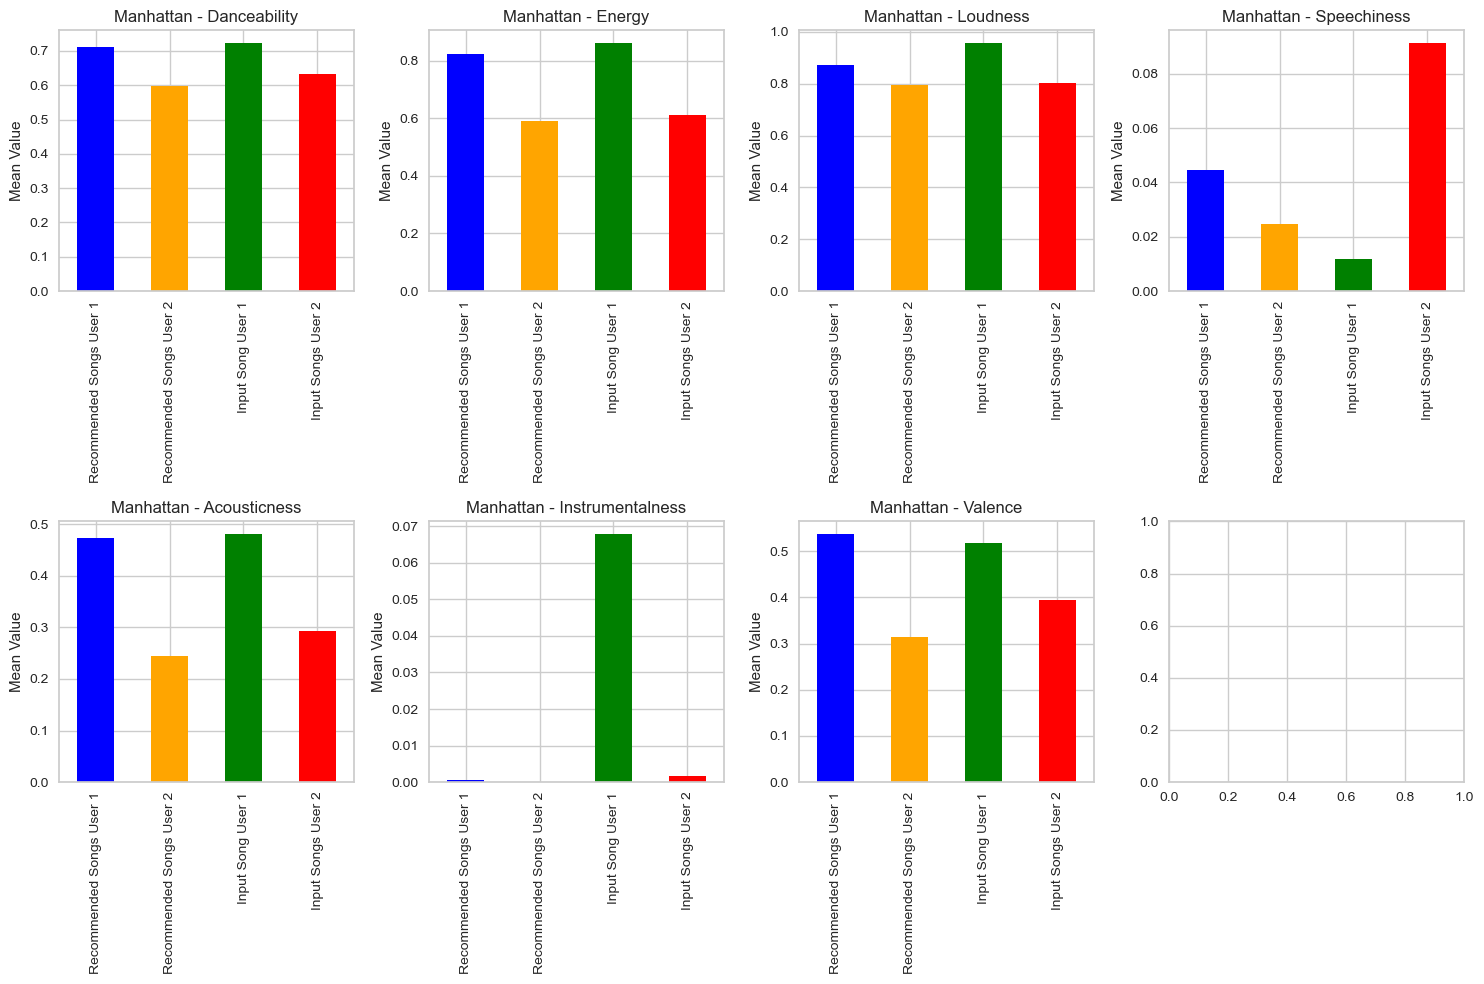

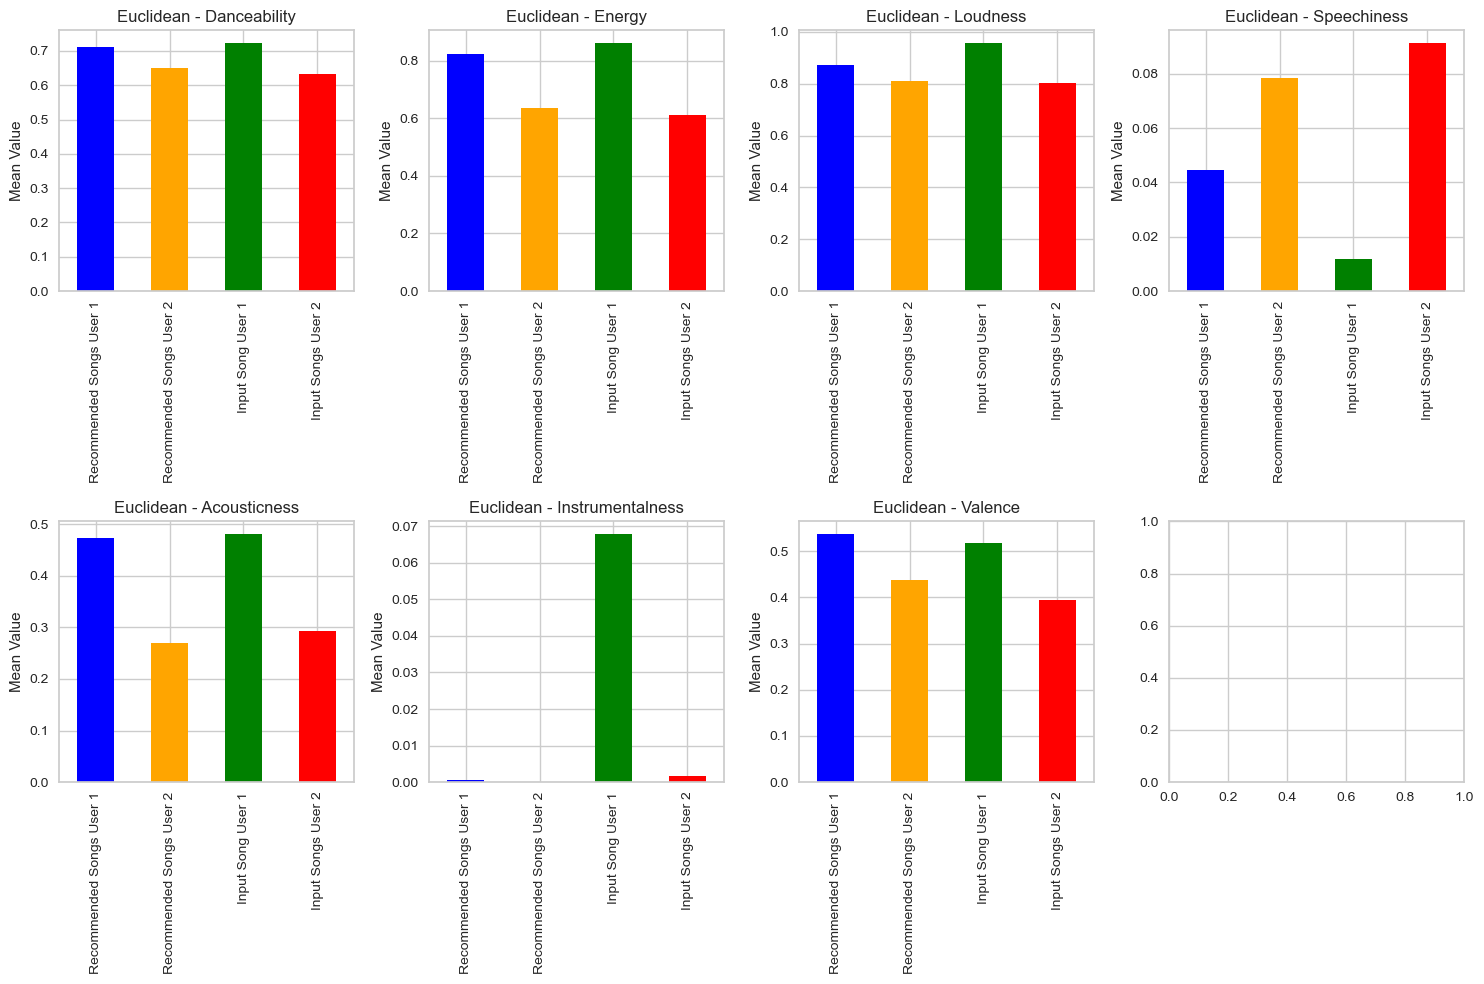

In [78]:
# Features to plot
features = features_columns


mean_values_manhattan = pd.DataFrame({
    'Recommended Songs User 1': mean_features_recommended_user1_manhattan_df['Recommended'].values,
    'Recommended Songs User 2': mean_features_recommended_user2_manhattan_df['Recommended'].values,
    'Input Song User 1': mean_features_user1_df['User 1'].values,
    'Input Songs User 2': mean_features_user2_df['User 2'].values
}, index=features)

mean_values_euclidean = pd.DataFrame({
    'Recommended Songs User 1': mean_features_recommended_user1_euclidean_df['Recommended'].values,
    'Recommended Songs User 2': mean_features_recommended_user2_euclidean_df['Recommended'].values,
    'Input Song User 1': mean_features_user1_df['User 1'].values,
    'Input Songs User 2': mean_features_user2_df['User 2'].values
}, index=features)


mean_values_cosine = pd.DataFrame({
    'Recommended Songs User 1': mean_features_recommended_user1_cosine_df['Recommended'].values,
    'Recommended Songs User 2': mean_features_recommended_user2_cosine_df['Recommended'].values,
    'Input Song User 1': mean_features_user1_df['User 1'].values,
    'Input Songs User 2': mean_features_user2_df['User 2'].values
}, index=features)



fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, feature in enumerate(features):
    ax = axes[i // 4, i % 4] 
    mean_values_manhattan.T[feature].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green', 'red'])
    ax.set_title(f'Manhattan - {feature}')
    ax.set_ylabel('Mean Value')

fig.tight_layout()
plt.savefig(r'D:\Python\AML\CW1\plots\manhattan_mean_values.png')
plt.show()


fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, feature in enumerate(features):
    ax = axes[i // 4, i % 4]
    mean_values_euclidean.T[feature].plot(kind='bar', ax=ax, color=['blue', 'orange', 'green', 'red'])
    ax.set_title(f'Euclidean - {feature}')
    ax.set_ylabel('Mean Value')

fig.tight_layout()
plt.savefig(r'D:\Python\AML\CW1\plots\Euclidean_mean_values.png')
plt.show()




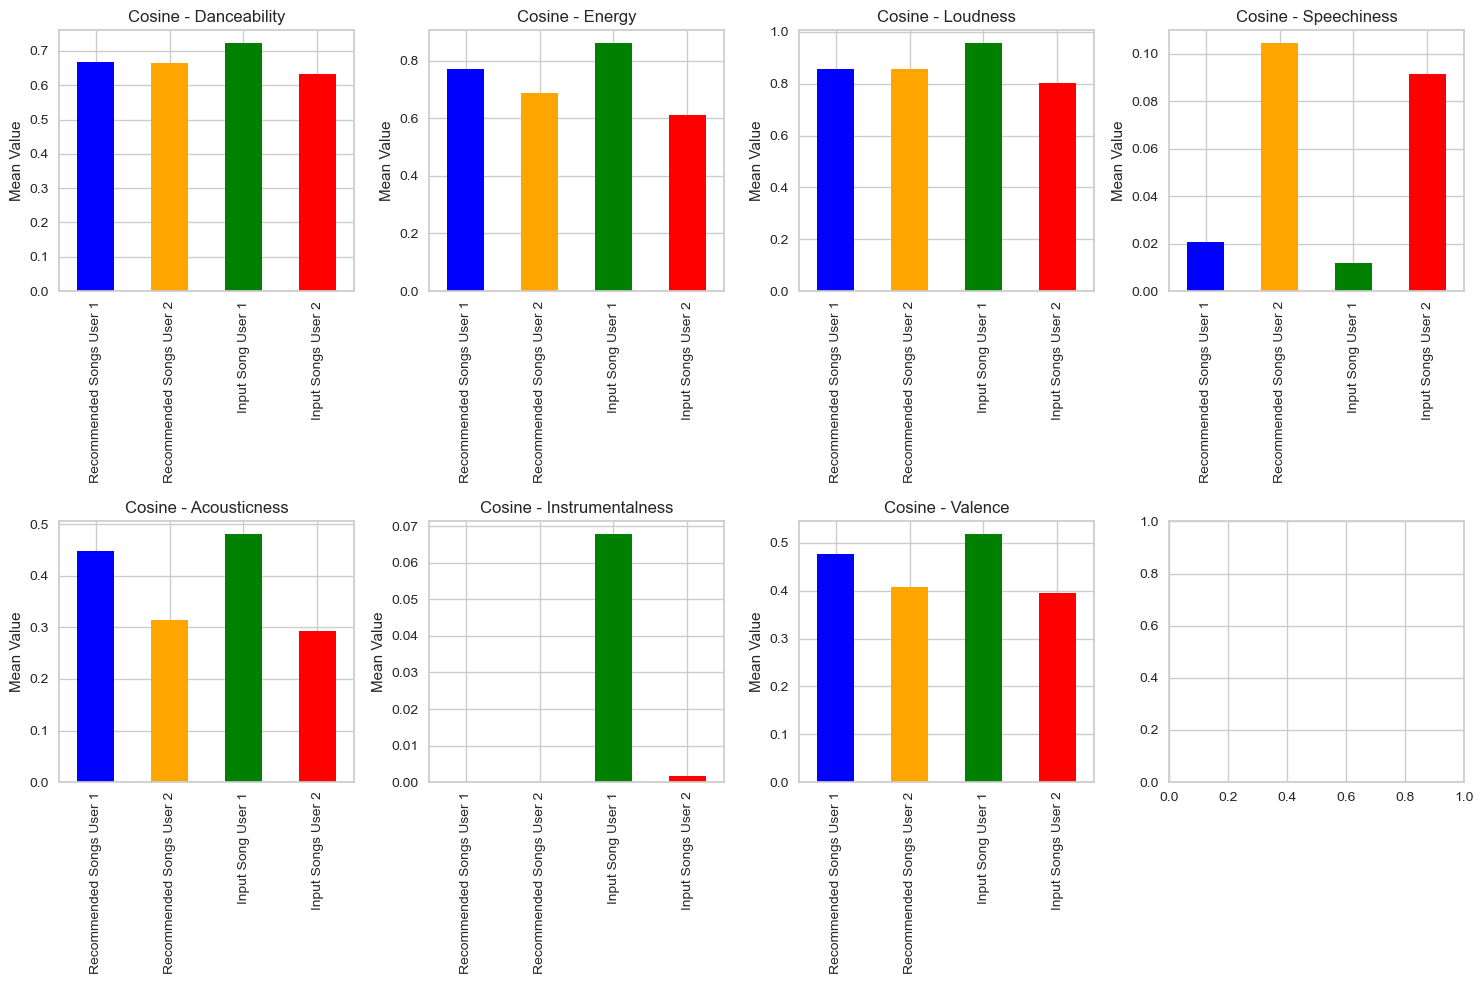

In [79]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    mean_values_cosine.T[feature].plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
    plt.title(f'Cosine - {feature}')
    plt.ylabel('Mean Value')
    
fig.tight_layout()
plt.savefig(r'D:\Python\AML\CW1\plots\Cosine_mean_values.png')
plt.show()
